# Kelvin Kipyegon Rotich
# DSF-FT06
# 15/09/2023

# Phase 1 Project.

## Business understanding

The movie business has been around from as early as 1895. The industry was dominated by movie studios such as Warner Bros, 20th Century Fox and Universal. In recent times however, tech companies such as Netflix, Apple and Amazon have joined in on the fun and had success. This has enticed some interest to Microsoft and they want to start their own movie creation company but the down side to their goal is that they do not have any knowledge of the movie business. This analysis will help them get some insights into the business and see what they need in order for their project to succeed.

## Objectives

* To show how profitable the movie industry is based on the data.
* To get some of the factors that lead to success in the movie industry based on the data.
* To look for the strong relationships between some of these factors.


## Data Understanding

This will focus with getting the basic information of the data provided for the study. The data will be useful in getting our objectives. First of all, we need to import the libraries needed.

In [3]:
# Import the necessary libraries for the data

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

With the libraries imported, we can set the display format of our values so that we do not use the scientific notations.

In [4]:
# Setting the display format to not use scientific notation.
pd.set_option('display.float_format', lambda x: '%.0f' % x)

We then create a function that would help us get a summary of our data. This function will be useful in studying the other DataFrames we create ahead.

In [5]:
# Creating a function that returns the summary of the data.
def summary(data):
    shape = data.shape
    columns = data.columns
    info = data.info()
    
    return shape, columns, info

We can now read the `.csv` files needed for the exploratory data analysis. The first DataFrame we read will be necessary to see how much revenue movies made in the United States(domestic_gross) and globally(foreign_gross) This data was obtained from `bom.movies_gross.csv.gz` which was obtained from `https://www.boxofficemojo.com/`.

In [6]:
# To read and check the data.
df1 = pd.read_csv("bom.movie_gross.csv.gz")
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


In [7]:
# Using the function we created to check the summary of df1.
summary(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


((3387, 5),
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 None)

Based on the data provided, we can see that there are 3387 rows and 5 columns in this DataFrame. However, there are three columns with null values. We will deal with them and other issues in the next segment. We can now read the next DataFrame we'll need for the analysis. The data here will be important in showing popularity of different movies and genres. This data was obtained from the `tmbd.movies.csv.gz` file which was obtained from `https://www.imdb.com/`.

In [8]:
#Reading and checking the data
df2 = pd.read_csv("tmdb.movies.csv.gz")
df2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,34,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,8,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,29,2010-03-26,How to Train Your Dragon,8,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,29,2010-05-07,Iron Man 2,7,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28,1995-11-22,Toy Story,8,10174
4,4,"[28, 878, 12]",27205,en,Inception,28,2010-07-16,Inception,8,22186


In [9]:
# Summary of df2
summary(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


((26517, 10),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
        'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
       dtype='object'),
 None)

In this DataFrame, we can see that there are 26517 rows with 10 columns. There are no missing values observed in this DataFrame. However, we will  be checking for duplicate and other issues in the next part. We can now read the final DataFrame for the analysis. This DataFrame will show some movies and their box office performances. This data was obtained from the `rt.movie_info.tsv.gz` file which was extracted from `https://www.rottentomatoes.com/`.

In [10]:
# Reading and checking the data
df3 = pd.read_csv("rt.movie_info.tsv.gz", sep='\t', encoding='latin1')
df3.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
# Checking its summary
summary(df3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


((1560, 12),
 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
        'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
        'studio'],
       dtype='object'),
 None)

This DataFrame contains 1560 rows and 12 columns. It has a lot of null values but we will check for them together with duplicates and other issues in the next topic. Now we can check our database which will be instrumental in the analysis. This database has information on movies and will be used as further information for this analysis. The database is from `im.db` file which was obtained from `https://www.themoviedb.org/`.

In [12]:
#Connecting to the database
conn = sqlite3.connect("im.db")

#Creating a cursor
cur = conn.cursor()

#Checking the table names of the database
cur.execute("""SELECT name FROM sqlite_master WHERE type = "table" """)
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

We can see that our database has 8 tables. However, we will focus on `movie_basics` and `movie_ratings` tables. Now that our data is available, we can now head to the next procedure.

## Data preparation

Here, we will check on our data for missing and duplicate values and other issues that may arise with our data. We will first focus on the missing values. We will create a function that will check on missing values in each DataFrame.

In [13]:
# Create a function that returns the percentage of null values in each column.
def null_percentage(data):
    null_count = data.isnull().sum()
    total_count = data.shape[0]
    percentage = (null_count / total_count) * 100
    return percentage

We will also create a function that returns the number of duplicates in the DataFrame.

In [14]:
# Creating a function that returns number of duplicate values
def sum_duplicates(data):
    return data.duplicated().sum()

We will now check the DataFrame and see its summary.

In [15]:
# Checking the data
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


In [16]:
# Checking summary of df1
summary(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


((3387, 5),
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 None)

Now we will check for the percentages of null values and number of duplicates in the DataFrame.

In [17]:
# To find percentage of null values in df1
null_percentage(df1)

title             0
studio            0
domestic_gross    1
foreign_gross    40
year              0
dtype: float64

In [18]:
# To find the number of duplicates in df1.
sum_duplicates(df1)

0

As we can see, there are missing values but no duplicates in the DataFrame. The percentage of missing values in `studio`, `domestic_gross` and `foreign_gross` are 0.147623, 0.826690 and 39.858282 respectively. Based on our study, it would be great if we dropped the rows with null values permanently. This would make it easier to analyse the data and it won't affect the data as much.

In [19]:
# Dropping the rows with null values and checking the null percentages
df1 = df1.dropna()
null_percentage(df1)

title            0
studio           0
domestic_gross   0
foreign_gross    0
year             0
dtype: float64

Now, we can see that there are no more null values in our DataFrame. We can now see the summary of the DataFrame.

In [20]:
# To see the summary of df1
summary(df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


((2007, 5),
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 None)

We can now see that the number of rows has reduced to 2007. Now we can check for anomalies in the DataFrame. We can see two other issues. The `foreign_gross` column is of datatype `object` and the `year` column is of datatype `int`. We need to change their datatypes to a float and date respectively.

In [21]:
# removing commas in the value of foreign gross for ease of converting it to int.
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '')

#Changing the datatype
df1['year'] = df1['year'].astype(object)
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')

#Checking the summary
summary(df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   object 
dtypes: float64(2), object(3)
memory usage: 94.1+ KB


((2007, 5),
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 None)

We can see that this DataFrame is now ready for analysis.  We can now head to the next DataFrame. We will check on the data and see a summary of the data.

In [22]:
# Checking data of df2.
df2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,34,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,8,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,29,2010-03-26,How to Train Your Dragon,8,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,29,2010-05-07,Iron Man 2,7,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28,1995-11-22,Toy Story,8,10174
4,4,"[28, 878, 12]",27205,en,Inception,28,2010-07-16,Inception,8,22186


In [23]:
# Checking summary information of df2.
summary(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


((26517, 10),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
        'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
       dtype='object'),
 None)

 We will first check the percentage of missing values in the DataFrame.

In [24]:
# Checking percentage of null values in df2.
null_percentage(df2)

Unnamed: 0          0
genre_ids           0
id                  0
original_language   0
original_title      0
popularity          0
release_date        0
title               0
vote_average        0
vote_count          0
dtype: float64

We can see that there are no null values in the dataset. We can also check for duplicate values in the DataFrame

In [25]:
# Checking for duplicate values in df2
sum_duplicates(df2)

0

We can also see that we have no duplicate values in the DataFrame. However, we have two issues with the DataFrame. First, we have an unnamed column that is not necessary. The `id` column is also of the wrong datatype. We need to drop the unnamed column and change the datatype of the `id` column.

In [26]:
# Dropping the unnamed column
df2 = df2.drop(columns=['Unnamed: 0'])


# Changing the datatype of the id column
df2['id'] = df2['id'].astype(object)

# Checking the summary
summary(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  object 
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ MB


((26517, 9),
 Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
        'release_date', 'title', 'vote_average', 'vote_count'],
       dtype='object'),
 None)

Our DataFrame is now ready for analysis. We can now head to the final DataFrame. We can check the summary of the data to see if there are any issues.

In [27]:
# Checking the data
df3.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [28]:
# Checking the summary
summary(df3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


((1560, 12),
 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
        'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
        'studio'],
       dtype='object'),
 None)

We can now check for missing values in the DataFrame.

In [29]:
# Checking for missing values 
null_percentage(df3)

id              0
synopsis        4
rating          0
genre           1
director       13
writer         29
theater_date   23
dvd_date       23
currency       78
box_office     78
runtime         2
studio         68
dtype: float64

As shown, there are a lot of missing values in the DataFrame. We need to remove them from the DataFrame. We can also see the summary of the DataFrame after removing them.

In [30]:
#Dropping the null values and checking the summary.
df3 = df3.dropna()
summary(df3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


((235, 12),
 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
        'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
        'studio'],
       dtype='object'),
 None)

As shown, we are left with 235 rows. We can now check for duplicates in the data.

In [31]:
# Checking for duplicate values.
sum_duplicates(df3)

0

There are no duplicate values in the DataFrame. However, there are some anomalies seen. We need to change the datatypes.

In [32]:
# Removing the commas in the values for ease of converting to integers.
df3['box_office'] = df3['box_office'].str.replace(',', '')

# Changing the datatypes
df3['id'] = df3['id'].astype(object)
df3['box_office'] = df3['box_office'].astype(int)
# Checking the summary again
summary(df3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    object
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    int32 
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int32(1), object(11)
memory usage: 22.9+ KB


((235, 12),
 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
        'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
        'studio'],
       dtype='object'),
 None)

Now the data in our DataFrames are cleaned and ready for analysis. For the database, we can remove the njull values by using a WHERE clauese and the NOT NULL clause. However, that is not necessary in this stage. We can now head to Exploratory Data Analysis.

## Exploratory Data Analysis.

### Univariate analysis.

Here we will analyse one table in each of the three DataFrames and one column in each of the database tables. We will begin with the first DataFrame. First we look at the categorical columns of the data. We will focus on the `studio` and `year` columns.

In [33]:
# Analysing the  studio  columns.
df1['studio'].value_counts()

Uni.        144
Fox         134
WB          130
Sony        105
BV          104
           ... 
KE            1
BBC           1
GrtIndia      1
CZ            1
FOAK          1
Name: studio, Length: 172, dtype: int64

In [34]:
# Analysing the year column.
df1['year'].value_counts()

2010    308
2011    290
2012    243
2014    234
2013    200
2016    192
2015    190
2017    177
2018    173
Name: year, dtype: int64

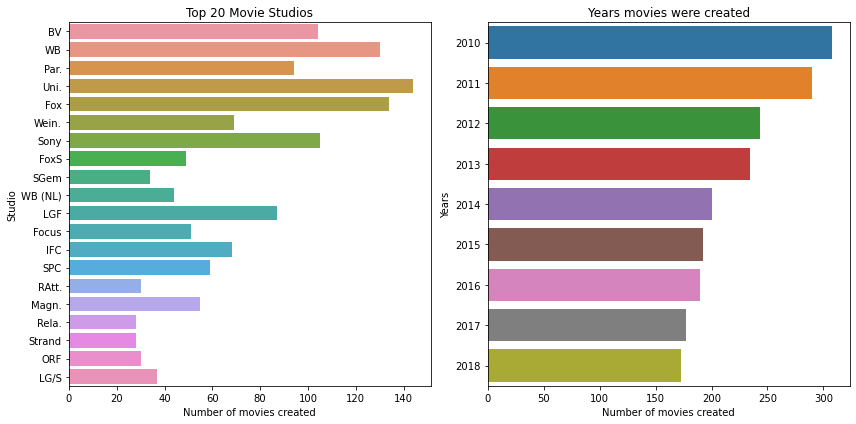

In [35]:
# Plotting horizontal bar graphs of studio and year

# Setting up the number of items to be shown in the studio graph
num_items = 20

# Subsetting it
subset = df1['studio'].value_counts().nlargest(num_items)

# Filtering df1
subset_data = df1[df1['studio'].isin(subset.index)]

# Setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plotting the studio horizontal bar graph
sns.countplot(y='studio', data = subset_data, ax=ax1, orient = 'h')
ax1.set_xlabel('Number of movies created')
ax1.set_ylabel('Studio')
ax1.set_title('Top 20 Movie Studios')

# Plotting the year horizontal bar graph
sns.barplot(x=df1['year'].value_counts(), y=df1['year'].unique(), ax=ax2, orient = 'h')
ax2.set_xlabel('Number of movies created')
ax2.set_ylabel('Years')
ax2.set_title('Years movies were created')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show();

As we can see from the `studio` column, there are 172 movie studios. The top 5 studios were `Uni.`, `Fox`, `WB`, `Sony` and `BV`. However, there is a noticeable decrease in the number of movies created per year. However, this will not be enough to fulfill our objectives. A bivariate analysis is needed. We can now go to the numeric data analysis. Here, we will observe `domestic_gross` and `foreign_gross`. We will look at the measures of central tendency and measures of dispersion. First we look at their statistics.

In [36]:
# Having a look at the statistics
df1.describe()


,domestic_gross,foreign_gross
count,2007,2007
mean,47019840,75790385
std,81626889,138179553
min,400,600
25%,670000,3900000
50%,16700000,19400000
75%,56050000,75950000
max,936700000,960500000


The means and medians of the two columns are given. We can also plot histograms of the two columns to help us with the analysis of the central tendencies.

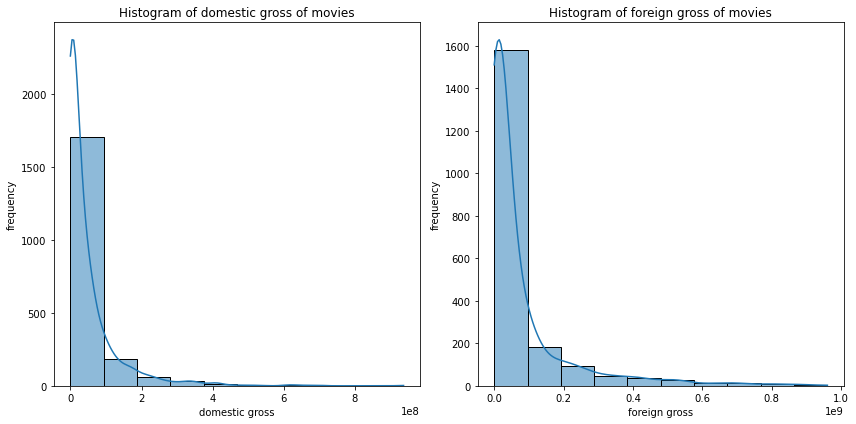

In [37]:
# Plotting the histograms

# Setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plotting the domestic gross histogram.
sns.histplot(data = df1, x = 'domestic_gross', bins =  10, kde = True, ax=ax1)
ax1.set_xlabel('domestic gross')
ax1.set_ylabel('frequency')
ax1.set_title('Histogram of domestic gross of movies')

# Plotting the foreign gross hitogram.
sns.histplot(data = df1, x = 'foreign_gross', bins =  10, kde = True, ax=ax2)
ax2.set_xlabel('foreign gross')
ax2.set_ylabel('frequency')
ax2.set_title('Histogram of foreign gross of movies')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt. show();


Based on the mean, median and the histogram, we can see that both datasets are positively skewed since the median are lower than the mean. This means that majority of the data is concentrated on the left side of the distribution and there are relatively few extreme values on the right side. However, this is not enough for the study. We also need to find the measures of dispersion to see how the values are far from the mean. Since the values of the standard deviation, 1st and 3rd quartiles are provided, we can go ahead and plot boxplots which will help us in our analysis.

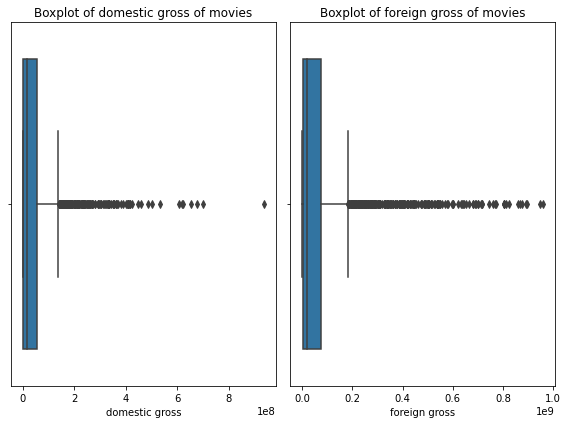

In [38]:
# Plotting the boxplots

# Setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 6))

# Plotting the domestic gross boxplot.
sns.boxplot(x = df1['domestic_gross'], ax=ax1)
ax1.set_xlabel('domestic gross')
ax1.set_title('Boxplot of domestic gross of movies')

# Plotting the foreign gross boxplot.
sns.boxplot(x = df1['foreign_gross'], ax=ax2)
ax2.set_xlabel('foreign gross')
ax2.set_title('Boxplot of foreign gross of movies')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt. show();

Based on the standard deviation, the quartiles and the boxplots, we can see that in both data sets, most of the data can be seen spread out over a wider range relative to the mean. This means that there is a high degree of variability or dispersion in the datasets. This analysis fulfils our first objective which was to show profitable the movie business is.

Now that we have completed the univariate analysis of the first DataFrame, we can go ahead and conduct the univariate analysis of the second DataFrame. First we will check on the data.

In [39]:
# Checking df2 data
df2.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,34,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,8,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,29,2010-03-26,How to Train Your Dragon,8,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,29,2010-05-07,Iron Man 2,7,12368
3,"[16, 35, 10751]",862,en,Toy Story,28,1995-11-22,Toy Story,8,10174
4,"[28, 878, 12]",27205,en,Inception,28,2010-07-16,Inception,8,22186


In [40]:
# Getting the summary of df2
summary(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  object 
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ MB


((26517, 9),
 Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
        'release_date', 'title', 'vote_average', 'vote_count'],
       dtype='object'),
 None)

There are nine columns in this DataFrame. However, we will focus on `original_language`, `populartity`, `vote_average` and `vote_count`.

Our categorical column in this case is `original_language`. We will analyse this the same way as before.

In [41]:
# Getting the number of unique values in the column
df2['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
kk        1
dz        1
hz        1
xh        1
yi        1
Name: original_language, Length: 76, dtype: int64

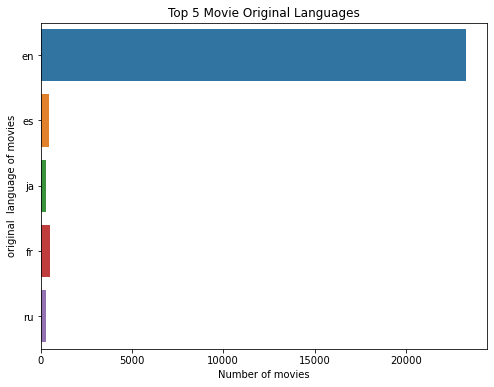

In [42]:
# Plotting a bar graph of original language

# Setting up the number of items to be shown in the graph
num_items2 = 5

# Subsetting it
subset2 = df2['original_language'].value_counts().nlargest(num_items2)

# Filtering df1
subset_data2 = df2[df2['original_language'].isin(subset2.index)]

# Setting up the figure and axes
fig, ax = plt.subplots(figsize = (8, 6))

# Plotting the horizontal bar graph
sns.countplot(y='original_language', data = subset_data2)
ax.set_xlabel('Number of movies')
ax.set_ylabel('original  language of movies')
ax.set_title('Top 5 Movie Original Languages')

# Showing the plot
plt. show();

As we can see most of the movies have their original language as English followed by Spanish, Japanese, French and Russian. This means that a lot of movies consider English as the  original language for their movies. This could be as a result of many successful movies being in English.However, we are not certain of this success because we don't have a way to quantify the success of the movies based on the language because we need to have a revenue column which is not in the DataFrame.

With that can look at the numeric columns.

Here, we will focus with `populartity`, `vote_average` and `vote_count`. We will check the measures of central tendency and measures of dispersion as before but first we should look at the statistical summary of the columns.

In [43]:
# Having a look at the statistical summary
df2.describe()

,popularity,vote_average,vote_count
count,26517,26517,26517
mean,3,6,194
std,4,2,961
min,1,0,1
25%,1,5,2
50%,1,6,5
75%,4,7,28
max,81,10,22186


For the measures of central tendency, we have been provided with the mean and standard deviation. However, we also need to plot a histogram to help us analyse them further.

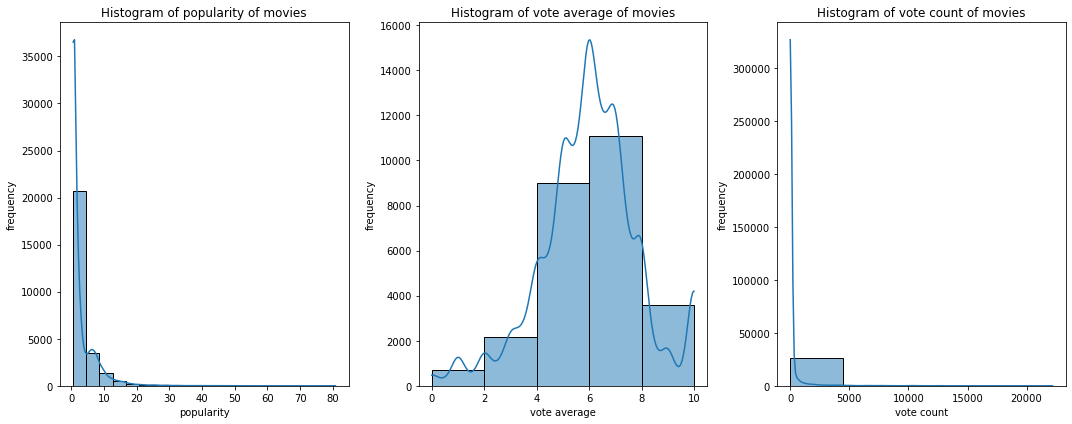

In [44]:
# Plotting histograms
# Setting up the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))

# Plotting the popularity histogram.
sns.histplot(data = df2, x = 'popularity', bins =  20, kde = True, ax=ax1)
ax1.set_xlabel('popularity')
ax1.set_ylabel('frequency')
ax1.set_title('Histogram of popularity of movies')

# Plotting the vote average hitogram.
sns.histplot(data = df2, x = 'vote_average', bins =  5, kde = True, ax=ax2)
ax2.set_xlabel('vote average')
ax2.set_ylabel('frequency')
ax2.set_title('Histogram of vote average of movies')

# Plotting the vote count hitogram.
sns.histplot(data = df2, x = 'vote_count', bins =  5, kde = True, ax=ax3)
ax3.set_xlabel('vote count')
ax3.set_ylabel('frequency')
ax3.set_title('Histogram of vote count of movies')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt. show();


We will analyse the popularity and vote counts columns. Based on the mean, median and the histograms, we can see that both datasets are positively skewed since the median are lower than the mean. This means that majority of the data is concentrated on the left side of the distribution and there are relatively few extreme values on the right side. The vote average has a different shape. We can see that the histogram has a symmetrical shape. We can also see that the mean and median are equal. This means that the values are spread out on both sides of the central point of the data.

However, this is not enough for the study. We also need to find the measures of dispersion to see how the values are far from the mean. Since the values of the standard deviation, 25th and 75th percentiles are provided, we can go ahead and plot boxplots which will help us in our analysis.

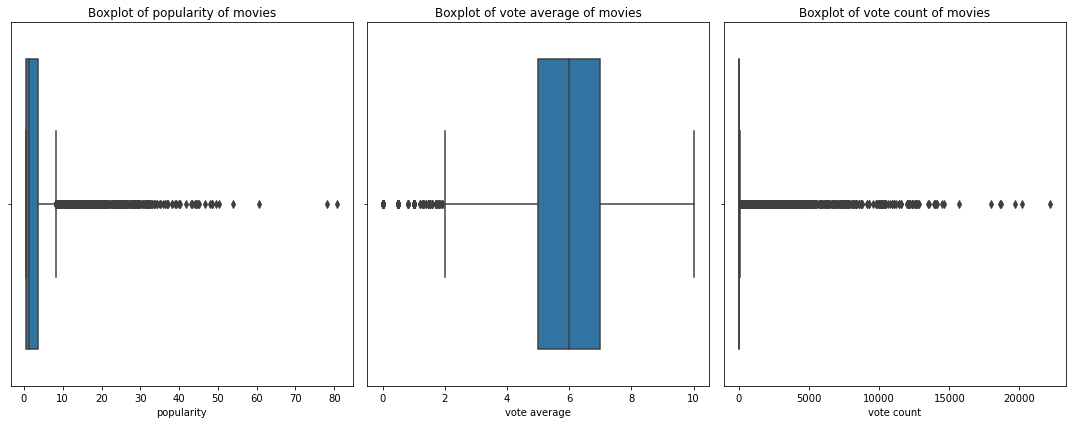

In [45]:
# Plotting the boxplots

# Setting up the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))

# Plotting the popularity boxplot.
sns.boxplot(x = df2['popularity'], ax=ax1)
ax1.set_xlabel('popularity')
ax1.set_title('Boxplot of popularity of movies')

# Plotting the foreign gross boxplot.
sns.boxplot(x = df2['vote_average'], ax=ax2)
ax2.set_xlabel('vote average')
ax2.set_title('Boxplot of vote average of movies')

# Plotting the foreign gross boxplot.
sns.boxplot(x = df2['vote_count'], ax=ax3)
ax3.set_xlabel('vote count')
ax3.set_title('Boxplot of vote count of movies')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt. show();

We will first focus on the popularity and vote count columns. Based on their standard deviation, quartiles and boxplots, we can see that in both data sets, most of the data can be seen spread out over a wider range relative to the mean. This means that there is a high degree of variability or dispersion in the datasets.
The vote average however has a different characteristic unlike the other two columns. We can see that the standard deviation is lower than the mean and the quartiles are close to the median. This means that the data have a relatively narrow spread and is not heavily skewed towards one extreme.
This analysis shows that even though there were a lot of popular movies, this does not mean that the popularity of the movie is guaranteed. We would need a revenue column which would make it easier to conduct bivariate analysis with respect to popularity. However, we do not have a revenue column.

Now that we have completed the univariate analysis of the second DataFrame, we can go ahead and conduct the univariate analysis of the third DataFrame. First we will check on the data.

In [46]:
# Checking on the data
df3.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures


In [47]:
# Summary of df3
summary(df3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    object
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    int32 
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int32(1), object(11)
memory usage: 22.9+ KB


((235, 12),
 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
        'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
        'studio'],
       dtype='object'),
 None)

Now that we have previewed our data, we can now conduct our univariate analysis. We will focus on `rating`, `genre`, `box_office` and `studio` columns.

For the categorical analysis, we will be interested in the `rating`, `genre` and `studio` columns. First, we will see how they have been distributed in the data. We will also create horizontal bar graphs to visualize the distribution.

In [48]:
# To see the value counts of the rating column
df3['rating'].value_counts()

R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: rating, dtype: int64

In [49]:
# To see the value counts of the genre column
df3['genre'].value_counts()

Drama                                                     33
Comedy                                                    32
Comedy|Drama                                              22
Drama|Mystery and Suspense                                11
Comedy|Drama|Romance                                       9
                                                          ..
Art House and International|Drama|Romance                  1
Comedy|Mystery and Suspense                                1
Drama|Science Fiction and Fantasy                          1
Action and Adventure|Animation|Kids and Family             1
Art House and International|Drama|Mystery and Suspense     1
Name: genre, Length: 76, dtype: int64

In [50]:
# To see the value counts of the studio column
df3['studio'].value_counts()

Universal Pictures        23
Paramount Pictures        15
Sony Pictures             12
20th Century Fox          12
Warner Bros. Pictures     11
                          ..
Destination Films          1
Reliance Entertainment     1
Summit Premiere            1
Screen Gems                1
The Film Arcade            1
Name: studio, Length: 101, dtype: int64

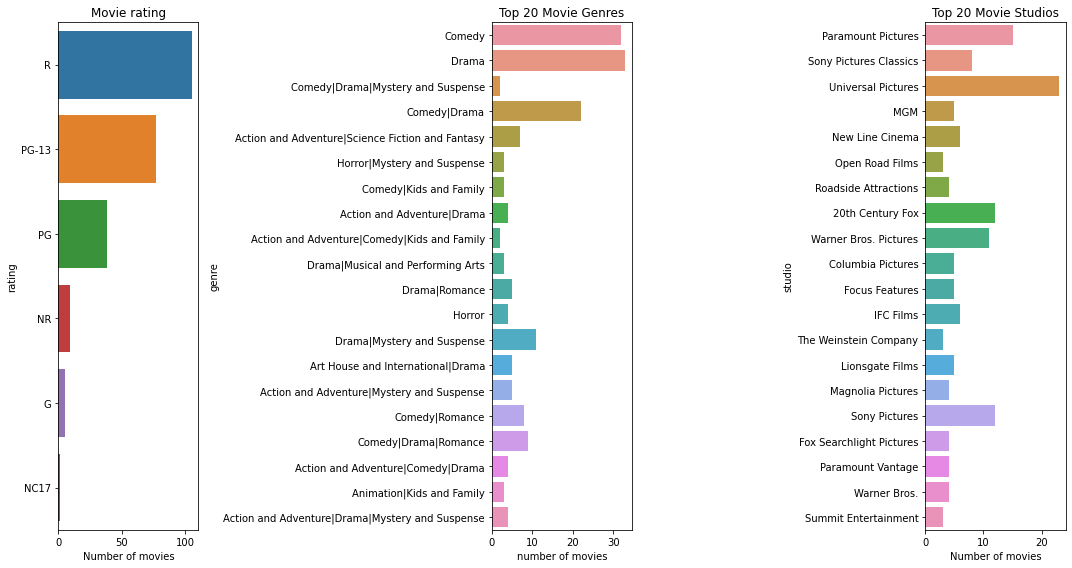

In [51]:
# Plotting horizontal bar graphs of studio and year

# Setting up the number of items to be shown in the genre and studio graph
num_items3 = 20

# Subsetting it
subset3 = df3['genre'].value_counts().nlargest(num_items3)
subset4 = df3['studio'].value_counts().nlargest(num_items3)

# Filtering df1
subset_data3 = df3[df3['genre'].isin(subset3.index)]
subset_data4 = df3[df3['studio'].isin(subset4.index)]

# Setting up the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 8))

# Plotting the horizontal bar graphs
# Plotting the rating horizontal bar graph
sns.barplot(x=df3['rating'].value_counts(), y=df3['rating'].unique(), ax=ax1)
ax1.set_xlabel('Number of movies')
ax1.set_ylabel('rating')
ax1.set_title('Movie rating')

# Plotting the rating horizontal bar graph
sns.countplot(y='genre', data = subset_data3, ax=ax2)
ax2.set_xlabel('number of movies')
ax2.set_ylabel('genre')
ax2.set_title('Top 20 Movie Genres')

# Plotting the rating horizontal bar graph
sns.countplot(y='studio', data = subset_data4, ax=ax3)
ax3.set_xlabel('Number of movies')
ax3.set_ylabel('studio')
ax3.set_title('Top 20 Movie Studios')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show();

Here we can see that R-rated movies had the highest number, followed by PG-13, PG, NR, G and NC17 movies respectively. We can also see that the genres with a lot of movies were comedy and drama. We can also note that Universal Pictures, Paramount Pictures, Sony Pictures, 20th Century Fox and Warner Bros. Pictures are the studios with the most number of movies in the dataset. This is a way to gauge on which genres, ratings and studios have had the greatest number of movies but this does not guarantee success of the movies. We would need more analysis of the data 

Now we can look at the numeric column in the dataset.

For this DataFrame, we have only one numeric column, the `box_office` column. We will start this analysis by checking the summary statistics of the data. 

In [52]:
# checking summary statistics
df3.describe()

,box_office
count,235
mean,41958400
std,62630156
min,363
25%,2302444
50%,15536310
75%,52649522
max,368000000


we already have the mean and median. We can now plot a histogram which will help us with this analysis.

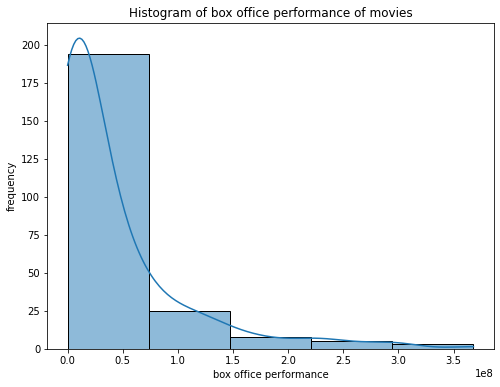

In [53]:
# Plotting the histogram
# Setting up the figure and axes
fig, ax = plt.subplots(figsize = (8, 6))

# Plotting the box office performance histogram.
sns.histplot(data = df3, x = 'box_office', bins =  5, kde = True)
ax.set_xlabel('box office performance')
ax.set_ylabel('frequency')
ax.set_title('Histogram of box office performance of movies')

# Showing the plot
plt. show();

Based on the mean, median and the histogram, we can see that the dataset is positively skewed since the median is lower than the mean. This means that majority of the data is concentrated on the left side of the distribution and there are relatively few extreme values on the right side. However, this is not enough for the study. We also need to find the measures of dispersion to see how the values are far from the mean. Since the values of the standard deviation, 1st and 3rd quartiles are provided, we can go ahead and plot boxplots which will help us in our analysis.

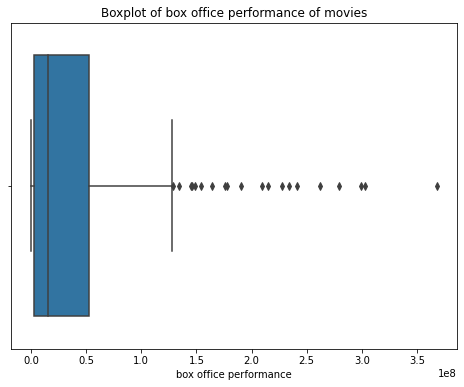

In [54]:
# Plotting the boxplots

# Setting up the figure and axes
fig, ax = plt.subplots(figsize = (8, 6))

# Plotting the popularity boxplot.
sns.boxplot(x = df3['box_office'])
ax.set_xlabel('box office performance')
ax.set_title('Boxplot of box office performance of movies')

# Showing the plot
plt.show();

Based on the standard deviation, the quartiles and the boxplot, we can see that in the dataset, most of the data can be seen spread out over a wider range relative to the mean. This means that there is a high degree of variability or dispersion in the dataset. This means that even though some of the movies performed exceptionally in the box office, it does not guarantee that making a movie will be successful and vice versa. It needs more analysis.

The univariate analysis has shown that the movie indusry has earned a lot of revenue for their creation studios hence fulfilling our first objective of profitability in the movie industry.

Now that we have completed the univariate analysis of all of the DataFrames, we can go ahead to the bivariate analysis.


### Bivariate analysis. 

We will now do the bivariate analysis to check the relationship between two columns in the three DataFrames and the two tables in the database. We will begin our analysis with the first DataFrame. First, we need to check on the Dataframe and its summary.

In [55]:
# Checking the data
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


In [56]:
# Checking the summary
summary(df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   object 
dtypes: float64(2), object(3)
memory usage: 94.1+ KB


((2007, 5),
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 None)

We will begin by comparing the `studio` columns with both the `domestic_gross` and the `foreign_gross` columns. Since we are comparing a categorical column with a continous column, We will use a bar graph. We will only use data of the top 10 studios for the plots. Before we plot the graphs, we have to check on the data. 

In [57]:
# Checking the data that compares studio and domestic gross for the top 20 studios.
data1 = df1.groupby('studio')['domestic_gross'].sum().nlargest(10).reset_index()
data1

,studio,domestic_gross
0,BV,18396529199
1,Uni.,12892038000
2,WB,12123600000
3,Fox,10924499997
4,Sony,8459479098
5,Par.,7580812699
6,LGF,3991851400
7,WB (NL),3975099999
8,LG/S,1965199998
9,P/DW,1682900000


In [58]:
# Checking the data that compares studio and foreign gross for the top 20 studios.
data2 = df1.groupby('studio')['foreign_gross'].sum().nlargest(10).reset_index()
data2

,studio,foreign_gross
0,BV,25793854700
1,Fox,20055866599
2,WB,18667902998
3,Uni.,16854771191
4,Sony,13945235998
5,Par.,11863384998
6,WB (NL),6339000000
7,LGF,4475619300
8,P/DW,3393600000
9,LG/S,3353724000


Before we analyse we can see that movie studios generate a lot of revenue from their movies. We can now have a look at the summary statistics of  both datasets.

In [59]:
# Checking the summary statistics of domestic gross
data1.describe()

,domestic_gross
count,10
mean,8199201039
std,5438099132
min,1682900000
25%,3979287849
50%,8020145898
75%,11823824999
max,18396529199


In [60]:
# Checking the summary statistics of foreign gross
data2.describe()

,foreign_gross
count,10
mean,12474295978
std,7903878256
min,3353724000
25%,4941464475
50%,12904310498
75%,18214620046
max,25793854700


We can see that the minimum amount of revenue in data1 and data2 are $1,682,900,000 and $3,353,724,000 respectively and the maximum amounts of the two datasets are $18,396,529,199 and $25,793,854,700 respectively. We can also see that even with grouping the columns in both instances, there is evidence of positive skewness and a higher degree of variability or dispersion in the dataset. We can now plot the bar graphs to see the top 10 studios by revenue creation.

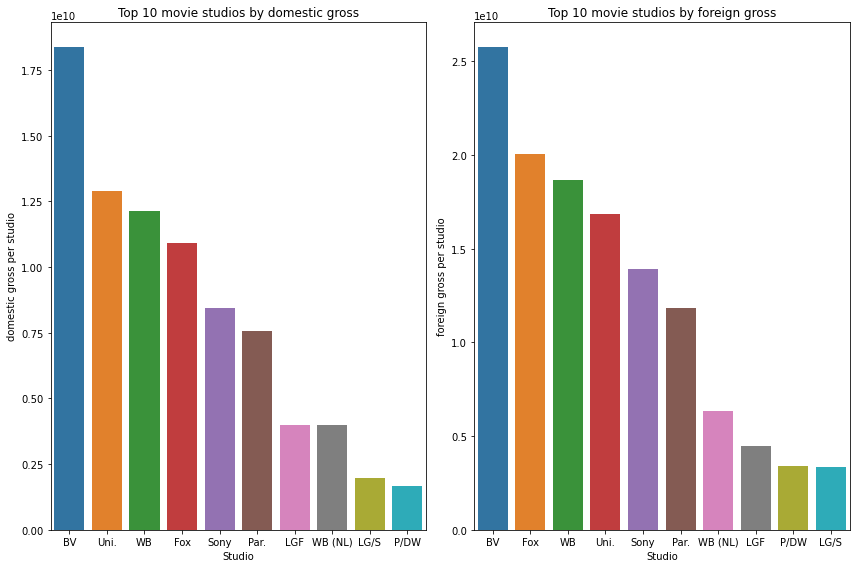

In [61]:
# Plotting the bar graphs

# Subsetting the data
data1 = df1.groupby('studio')['domestic_gross'].sum().nlargest(10).reset_index()
data2 = df1.groupby('studio')['foreign_gross'].sum().nlargest(10).reset_index()

# Setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))


# Plotting the first graph
sns.barplot(x='studio', y='domestic_gross', data = data1, ax=ax1)
ax1.set_xlabel('Studio')
ax1.set_ylabel('domestic gross per studio')
ax1.set_title('Top 10 movie studios by domestic gross')

# Plotting the second graph
sns.barplot(x='studio', y='foreign_gross', data = data2, ax=ax2)
ax2.set_xlabel('Studio')
ax2.set_ylabel('foreign gross per studio')
ax2.set_title('Top 10 movie studios by foreign gross')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show();

Even though their orders are different, we can see that the top 10 studios are the same in both graphs. This can only mean that these studios earn the most revenue either in the United States or globally. This shows that the movies created by these studios are very popular in the market. This means that the movies created by these studios are on high demand and Microsoft should use them as a benchmark if they want their movie business to be successful.

We can now go to the second DataFrame and conduct our bivariate analysis. We need to first check on our data and its summary.

In [62]:
# Checking the data
df2.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,34,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,8,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,29,2010-03-26,How to Train Your Dragon,8,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,29,2010-05-07,Iron Man 2,7,12368
3,"[16, 35, 10751]",862,en,Toy Story,28,1995-11-22,Toy Story,8,10174
4,"[28, 878, 12]",27205,en,Inception,28,2010-07-16,Inception,8,22186


In [63]:
# Checking the summary
summary(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  object 
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ MB


((26517, 9),
 Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
        'release_date', 'title', 'vote_average', 'vote_count'],
       dtype='object'),
 None)

Here, we will focus on the vote average and vote count columns. We will now compare the columns by creating a scatter plot.

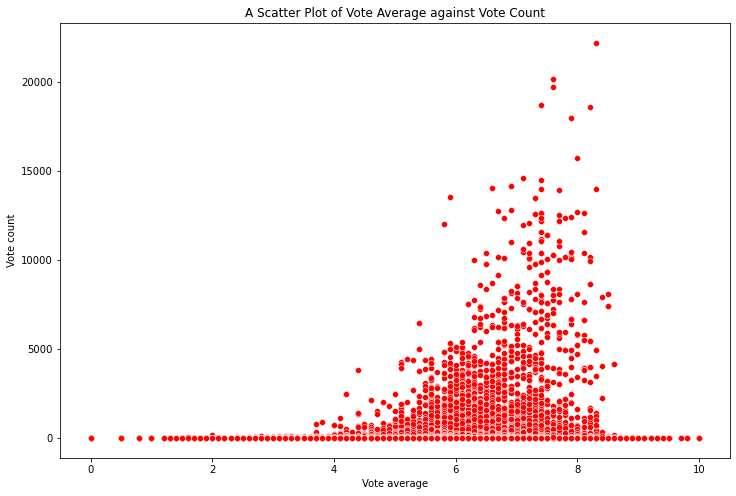

In [64]:
# Setting up the figure and axes
fig, ax = plt.subplots(figsize = (12, 8))

# Plotting the scatter plot
sns.scatterplot(x=df2['vote_average'], y=df2['vote_count'], color = 'red')
ax.set_xlabel('Vote average')
ax.set_ylabel('Vote count')
ax.set_title('A Scatter Plot of Vote Average against Vote Count')

# Showing the plot
plt.show();


As we can see, most of the vote counts had a vote average between 5 and 8. This shows that most of the people who voted gave from an average review to an above average review of the movies they watched. This means that most people were impressed by the movies they watched. With this we see that there is a relationship between movie review and the number of people who voted in these reviews. However, we will study more of this relationship in the next segment. 

Now we will undertake the bivariate analysis of the third DataFrame but first we will need to check the data and its summary. 

In [65]:
# Checking the data
df3.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures


In [66]:
# Checking the summary
summary(df3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    object
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    int32 
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int32(1), object(11)
memory usage: 22.9+ KB


((235, 12),
 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
        'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
        'studio'],
       dtype='object'),
 None)

Now that we have the information we need, we can now see the columns we will focus on. We will go with the rating and box office columns. We will first create a groupby dataframe of the two columns and see its summary statistics.

In [67]:
# Grouping the data
data3 = df3.groupby('rating')['box_office'].sum().nlargest().reset_index()
data3

,rating,box_office
0,PG-13,5291716108
1,R,2514567999
2,PG,2009926506
3,G,37013942
4,NR,5739231


In [68]:
# Summary statistics of data3
data3.describe()

,box_office
count,5
mean,1971792757
std,2175240546
min,5739231
25%,37013942
50%,2009926506
75%,2514567999
max,5291716108


We can also plot a bar graph to help us with the analysis.

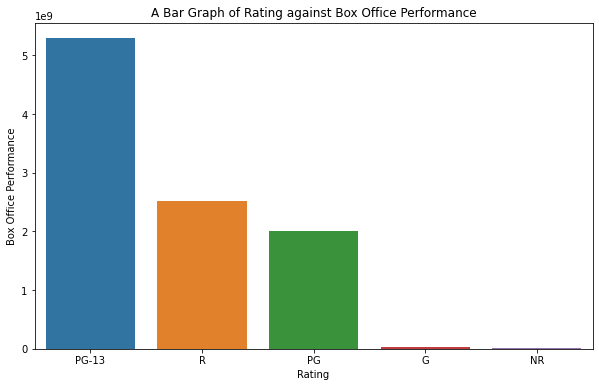

In [69]:
# Plotting the bar graph

# Setting up the figure and axes
fig, ax = plt.subplots(figsize = (10, 6))

# Plotting the graph
sns.barplot(x='rating', y='box_office', data = data3)
ax.set_xlabel('Rating')
ax.set_ylabel('Box Office Performance')
ax.set_title('A Bar Graph of Rating against Box Office Performance')

# Showing the plot
plt.show();

Based on  the groupby, its summary statistics and bar graph, we can see that the PG-13, R-rated and the PG movies had the most revenue. This means that these ratings are popular to the market. Therefore, movie ratings should be taken into consideration when Microsoft decides to create their movies. They should create a ratio of movies based on the ratings since it should attract the market irregardless of their age.

We can now head to analyse the columns in the database tables. We need to see all the columns in the `movie_ratings` table. We will create a DataFrame using a query.

In [70]:
# Creating a query

query1 = """
SELECT *
FROM movie_ratings;
"""
# Creating a DataFrame and checking the data

table1 = pd.read_sql(query1, conn)
table1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20
3,tt1043726,4,50352
4,tt1060240,6,21


We will create a scatter plot that will compare `averagerating` and `numvotes`.

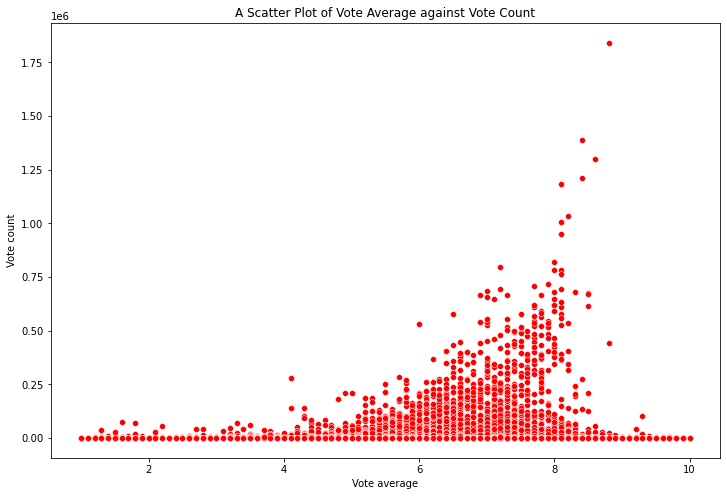

In [71]:
## Setting up the figure and axes
fig, ax = plt.subplots(figsize = (12, 8))

# Plotting the scatter plot
sns.scatterplot(x=table1['averagerating'], y=table1['numvotes'], color = 'red')
ax.set_xlabel('Vote average')
ax.set_ylabel('Vote count')
ax.set_title('A Scatter Plot of Vote Average against Vote Count')

# Showing the plot
plt.show();


As we can see, most of the vote counts had a vote average between 6 and 8. This shows that most of the people who voted gave an above average review of the movies they watched. With this we see that there is a relationship between movie review and the number of people who voted in these reviews. However, we will study more of this relationship in the next segment.

With the bivariate analysis, we can see that studios, movie ratings, number of reviewers and review ratings are essential for movie success and these are some of the things Microsoft should be interested in before creating their movie company.


We can now head into the final part of the study; multivariate analysis.

### Multivariate analysis

Here, we will focus on analysis of multiple columns. We will do this by creating heatmaps of the numerical columns to show the correlation matrices of the data. We will begin our analysis with the first DataFrame. 

In [72]:
# Checking the summary of the data
summary(df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   object 
dtypes: float64(2), object(3)
memory usage: 94.1+ KB


((2007, 5),
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 None)

We will now plot a heat map to create the correlation matrix of the numeric columns.

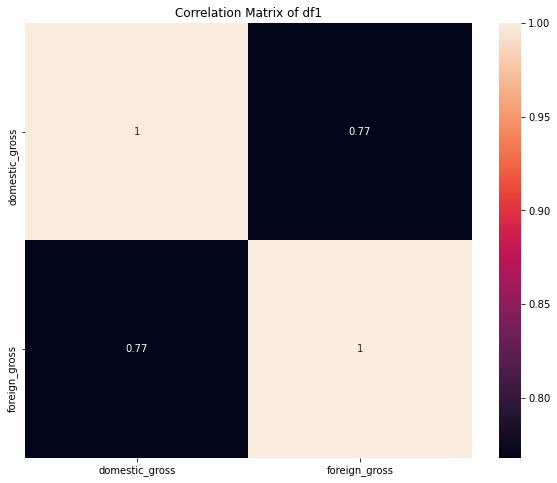

In [73]:
# Plotting the correlation matrix

# Selecting the numerical variables for which you want to calculate the correlation matrix
numerical_vars = df1[['domestic_gross', 'foreign_gross']]

#Calculating the correlation matrix using the corr() method
correlation_matrix = numerical_vars.corr()

#Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of df1')
plt.show();


Based on the correlation matrix, we can see that there is a high positive correlation between the two columns. This means that they have a strong linear relationship in which they tend to increase or decrease together. Microsoft should therefore note that the success of their movies in the United States alone would not be enough. They should also appeal the global market if they want to guarantee success.

We can now head to the second DataFrame and have a look at its summary info followed by ploting the heatmap.

In [74]:
# Checking the summary info
summary(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  object 
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ MB


((26517, 9),
 Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
        'release_date', 'title', 'vote_average', 'vote_count'],
       dtype='object'),
 None)

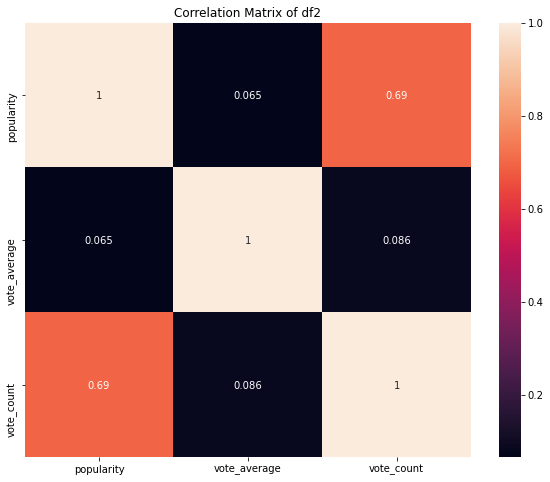

In [75]:
#  Plotting the correlation matrix

# Selecting the numerical variables for which you want to calculate the correlation matrix
numerical_vars = df2[['popularity', 'vote_average', 'vote_count']]

#Calculating the correlation matrix using the corr() method
correlation_matrix = numerical_vars.corr()

#Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of df2')
plt.show();


Here, we can see that the popularity and vote average columns have a low positive correlation. This can also be seen with the vote count and vote average columns. This means that even though there may be some tendency of the variables to increase together, it is not a strong or consistent pattern. However, we can also see that the vote count and popularity columns have a high positive correlation. This means that they have a strong linear relationship in which they tend to increase or decrease together. For Microsoft, this means that the more the people who use their streaming service and give positive reviews to their movies, the more the popularity of the streaming service grows. Microsoft in this case should create their movies in a unique way that appeals the market.

Finally, we can conclude the study by analysing the tables in the database. In this case, we will LEFT JOIN the tables and create a DataFrame for the tables.

In [76]:
# Creating a query.
query2 = """
SELECT *
FROM movie_basics as b
LEFT JOIN movie_ratings as r
ON b.movie_id = r.movie_id
WHERE r.movie_id IS NOT NULL;
"""

# Creating a dataframe and checking the data
table2 = pd.read_sql(query2, conn)
table2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance,tt10356526,8,31
1,tt10384606,Borderless,Borderless,2019,87,Documentary,tt10384606,9,559
2,tt1042974,Just Inès,Just Inès,2010,90,Drama,tt1042974,6,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99,"Action,Adventure,Fantasy",tt1043726,4,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73,"Mystery,Thriller",tt1060240,6,21


We can also look at the summary of the data.

In [77]:
# Checking summary of table2
summary(table2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


((73856, 9),
 Index(['movie_id', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes'],
       dtype='object'),
 None)

We will then focus on the `averagerating` and `numvotes` columns for our analysis.

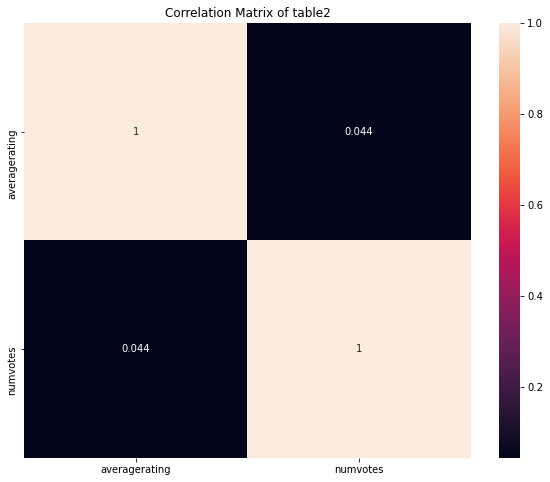

In [78]:
#  Plotting the correlation matrix

# Selecting the numerical variables for which you want to calculate the correlation matrix
numerical_vars = table2[['averagerating', 'numvotes']]

#Calculating the correlation matrix using the corr() method
correlation_matrix = numerical_vars.corr()

#Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of table2')
plt.show();


Here, we can see that `averagerating` and `numvotes` have a low positive correlation. This means that even though there may be some tendency of the variables to increase together, it is not a strong or consistent pattern. This means that even though the correlation is low, Microsoft should not ignore it. On the contrary, they should use it as reference when looking at the reviews of their movie company. 

The multivariate analysis has proven that there is a strong relationship between domestic gross and foreign gross. There is also a strong relationship between review ratings and the number of people who voted in these reviews and Microsoft should take a lot of interest with these relationships.